# Data Analysis

In [17]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [18]:
# Importing the dataset
df = pd.read_csv('data/output/data_complete_grouped_2022-06-30.csv')
df = df[df['dataset']=='June']

In [19]:
df.describe()

,Outside Temperature,Avg. Temperature,RH,va,Tg,Gender,Age,Height,Weight,Duration,Icl,Thermal feeling (global)
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,21.655250,26.543985,46.984615,0.076538,26.466346,0.384615,34.730769,172.500000,69.538462,7.115385,0.563085,0.461538
std,2.519944,1.359572,4.977763,0.057185,1.601921,0.491251,16.593308,11.656018,15.833028,4.383140,0.218057,0.778675
min,18.094000,23.220000,38.230000,0.000000,23.250000,0.000000,7.000000,120.000000,30.000000,2.500000,0.294600,-1.000000
25%,19.688000,25.328750,43.122500,0.030000,25.295000,0.000000,21.500000,168.000000,56.500000,5.000000,0.451162,0.000000
50%,20.750500,26.800000,48.570000,0.100000,26.690000,0.000000,32.000000,172.000000,70.000000,5.000000,0.461600,1.000000
75%,23.906000,27.554500,50.930000,0.110000,27.640000,1.000000,46.250000,178.000000,80.000000,10.000000,0.620250,1.000000
max,25.500000,28.775000,56.710000,0.210000,28.970000,1.000000,80.000000,200.000000,108.000000,20.000000,1.430200,1.000000


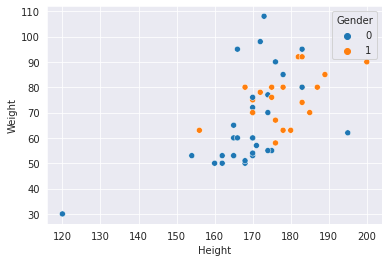

In [20]:
sns.scatterplot(data=df, hue='Gender', x='Height', y='Weight')
plt.show()

In [21]:
def function(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

df['comfort_group'] = df['Thermal feeling (global)'].apply(function)

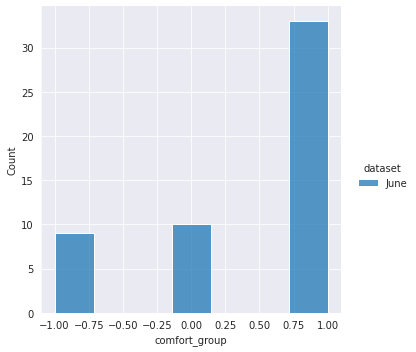

In [22]:
sns.displot(data=df, x="comfort_group", hue="dataset", multiple="stack")
plt.show()

# Analysis of function models
Can a linear model really be trusted when so many data points have the same y value? (0)
and is it ok to reduce the spectrum form (-3,3) to (-1,1)?

## Short visualization using only one feature

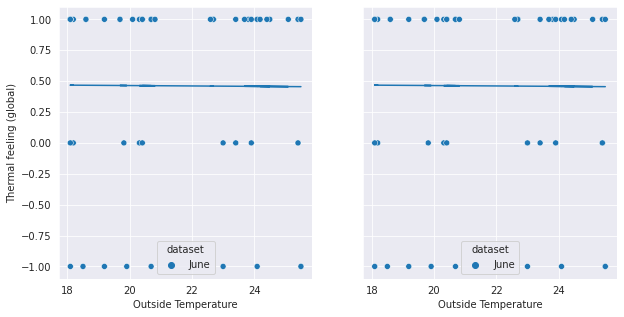

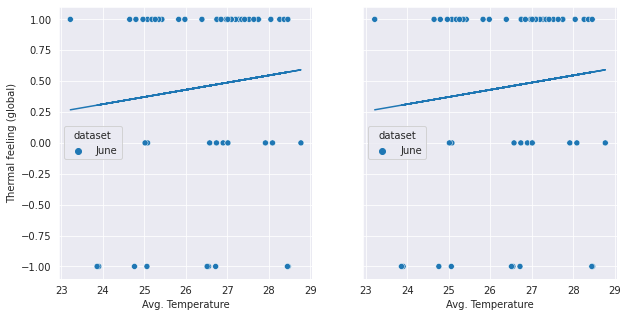

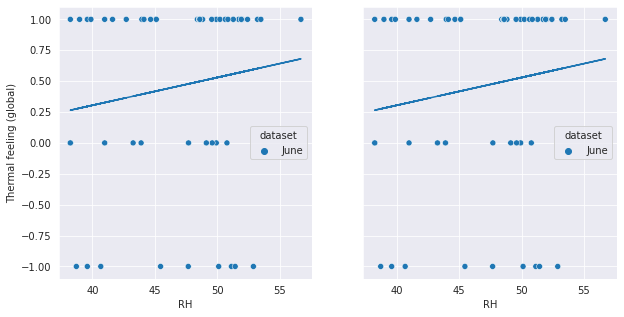

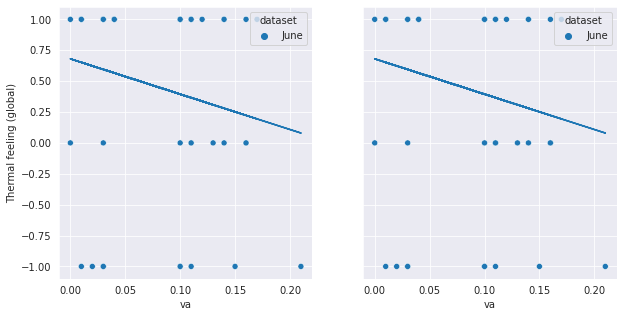

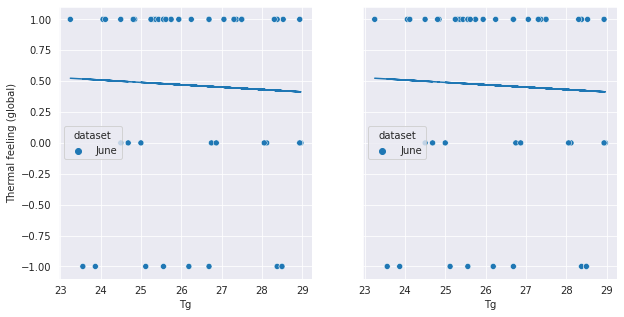

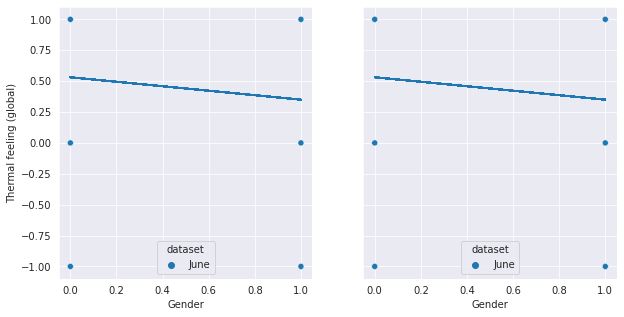

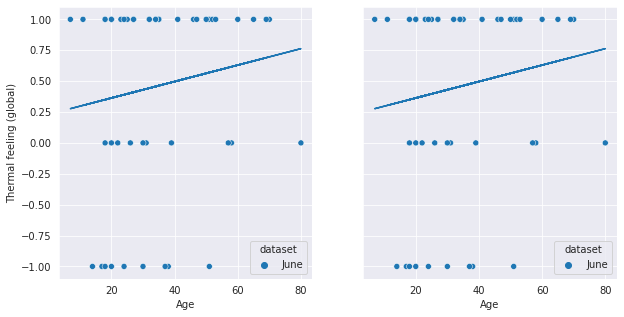

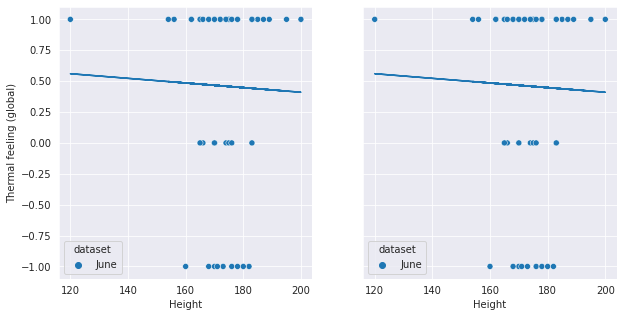

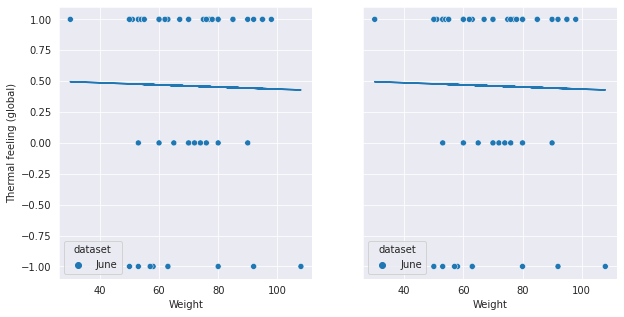

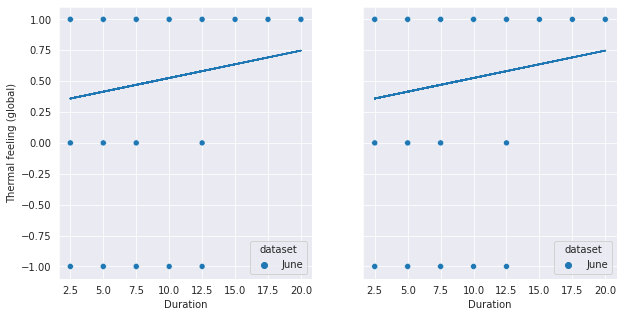

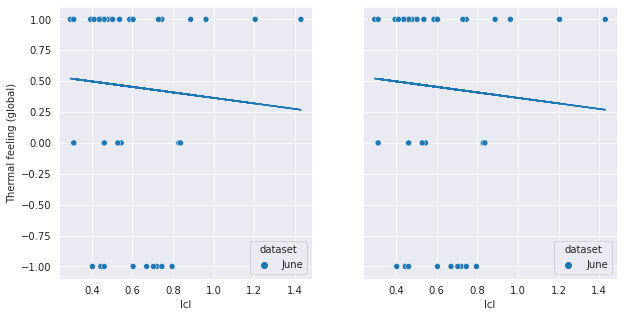

In [23]:
for col in ['Outside Temperature', 'Avg. Temperature', 'RH', 'va', 'Tg',
       'Gender', 'Age', 'Height', 'Weight', 'Duration', 'Icl']:

    fig, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10, 5))

    # Whole y range (-3, 3)
    m,c = np.polyfit(df[col], df['Thermal feeling (global)'], 1)
    y = m*df[col] + c

    sns.scatterplot(ax=axes[0],data=df, x=col, y='Thermal feeling (global)', hue='dataset')
    axes[0].plot(df[col], y)
    # Reduced range (-1, 1)
    m2,c2 = np.polyfit(df[col], df['comfort_group'], 1)
    y = m2*df[col] + c2

    sns.scatterplot(ax=axes[1],data=df, x=col, y='comfort_group', hue='dataset')
    axes[1].plot(df[col], y)
    plt.show()


Fazit: For predictive models, the y-range should not be reduced to (-1, 1). No feature shows clearly a linear relationship